In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cPickle
import gzip

def npSoftmax(X):
    e = np.exp(X)
    return e/np.sum(e,axis=0,keepdims=True)

def prediction(Al, Ynum):
    arg = np.argmax(Al,axis=0)
    arg = arg.reshape(1,Ynum.shape[1])
    # print(arg.shape, Ynum.shape)
    cnt = 0
    # print("predicting")
    for i in range(Ynum.shape[1]):
        if(arg[0,i]==Ynum[0,i]):
            cnt = cnt+1
    return (cnt/Ynum.shape[1])

def para_init(n_X) :
    W = np.random.randn(10, n_X)*0.01
    b = np.zeros((10,1))

    return W, b

def update(X, W, b, A, Y, lr):
    m = Y.shape[1]
    dZ = A - Y
    dW = np.dot(dZ,X.T)/m
    db = np.sum(dZ,axis=1).reshape(10,1)/m

    W -= lr*dW
    b -= lr*db

    return W,b

def forward_prop(X, W, b):
    Z = np.dot(W,X) + b
    A = npSoftmax(Z)

    return Z, A

def costcomp(A, Y):
    c = np.sum(-1*(Y*np.log(A)))/Y.shape[1]
    return c


def learn(X, X_test, W, b, Y, Y_test, Ynum, Ynum_test, lr, num_iter, show):
    costs = []
    costs_test =[]
    accs = []
    accs_test = []
    for i in range(num_iter):
        Z, A = forward_prop(X, W, b)
        Z_test, A_test = forward_prop(X_test, W, b)
        W, b = update(X, W, b, A, Y, lr)
        costs.append(costcomp(A, Y))
        costs_test.append(costcomp(A_test,Y_test))
        accs.append(100*prediction(A,Ynum))
        accs_test.append(100*prediction(A_test,Ynum_test))
        if show and i%10 == 0:
            print("Iterations : ", i)
            print("Tr_Acc : ", accs[i], "Test_Acc : ", accs_test[i])
            print("Tr_Cost : ", costs[i], "Test_Cost : ", costs_test[i])


    return W, b, accs, costs, accs_test, costs_test


data = gzip.open("/media/khurshed2504/Data/PycharmProjects/ML_temp0/mnist.pkl.gz")
train_data,  validation_data, test_data = cPickle.load(data,encoding="latin1")


X = train_data[0]
X = X.T
print("X Shape : ",X.shape)
n_X = X.shape[0]
m = X.shape[1]

Ynum = train_data[1]
print("Ynum Shape (Native) : ", Ynum.shape)
Ynum = Ynum.reshape(1, Ynum.shape[0])
print("Ynum Shape (After Reshape) : ", Ynum.shape)
print(Ynum)

print("Shape of Test Data : ", test_data[0].shape)
# Y = np.eye(10)[Ynum]
# print(Y.shape)
# Y = Y.squeeze()
# print(Y.shape)
# Y = Y.reshape(10,50000)
Y = np.zeros((10,m))
for i in range(m):
    Y[int(Ynum[0,i]),i]=1


X_test = test_data[0]
X_test = X_test.T
m_test = X_test.shape[1]
Ynum_test = test_data[1]
#print("Ynum Shape (Native) : ", Ynum.shape)
Ynum_test = Ynum_test.reshape(1, Ynum_test.shape[0])
Y_test = np.zeros((10,m_test))
for i in range(m_test):
    Y_test[int(Ynum_test[0,i]),i]=1
#print("Ynum Shape (After Reshape) : ", Ynum.shape)
#print(Ynum1)
# print(A.shape)
# print("Accuracy over Test Set is : ",100*prediction(A,Ynum_test))
    
    
W, b = para_init(n_X)

# for i in range(50):
#     Y1 = np.array(Y[:, 1000*(i):1000*(i+1)]).reshape(10, 1000)
#     X1 = np.array(X[:, 1000*(i):1000*(i+1)]).reshape(784, 1000)
#     Ynum1 = np.array(Ynum[:, 1000 * (i):1000 * (i + 1)]).reshape(1, 1000)
W, b, accs, costs, accs_test, costs_test = learn(X, X_test, W, b, Y, Y_test, Ynum, Ynum_test, lr = 0.1, num_iter = 1000, show = True)

X Shape :  (784, 50000)
Ynum Shape (Native) :  (50000,)
Ynum Shape (After Reshape) :  (1, 50000)
[[5 0 4 ... 8 4 8]]
Shape of Test Data :  (10000, 784)
Iterations :  0
Tr_Acc :  8.450000000000001 Test_Acc :  7.470000000000001
Tr_Cost :  2.3067055183143728 Test_Cost :  2.3084915347336
Iterations :  10
Tr_Acc :  76.588 Test_Acc :  78.09
Tr_Cost :  1.557041293713794 Test_Cost :  1.5398224005295797
Iterations :  20
Tr_Acc :  80.10000000000001 Test_Acc :  81.56
Tr_Cost :  1.1985966027263215 Test_Cost :  1.1728900470808028
Iterations :  30
Tr_Acc :  81.93 Test_Acc :  83.14
Tr_Cost :  1.0056890634773772 Test_Cost :  0.9762268287042348
Iterations :  40
Tr_Acc :  83.048 Test_Acc :  84.22
Tr_Cost :  0.8873011864274217 Test_Cost :  0.856094030256213
Iterations :  50
Tr_Acc :  83.76400000000001 Test_Acc :  85.11999999999999
Tr_Cost :  0.8071998585788684 Test_Cost :  0.7751718994957076
Iterations :  60
Tr_Acc :  84.416 Test_Acc :  85.67
Tr_Cost :  0.7491383462143744 Test_Cost :  0.7167528128107691


Iterations :  670
Tr_Acc :  89.74 Test_Acc :  90.55
Tr_Cost :  0.3765270336387065 Test_Cost :  0.353469283187938
Iterations :  680
Tr_Acc :  89.762 Test_Acc :  90.53999999999999
Tr_Cost :  0.3755002292654666 Test_Cost :  0.35254866267562907
Iterations :  690
Tr_Acc :  89.804 Test_Acc :  90.58
Tr_Cost :  0.3744960842742712 Test_Cost :  0.35164960225308145
Iterations :  700
Tr_Acc :  89.826 Test_Acc :  90.60000000000001
Tr_Cost :  0.3735137632369685 Test_Cost :  0.3507712905823063
Iterations :  710
Tr_Acc :  89.834 Test_Acc :  90.59
Tr_Cost :  0.3725524733580767 Test_Cost :  0.34991295817898116
Iterations :  720
Tr_Acc :  89.862 Test_Acc :  90.63
Tr_Cost :  0.37161146172112625 Test_Cost :  0.34907387469126233
Iterations :  730
Tr_Acc :  89.88000000000001 Test_Acc :  90.64999999999999
Tr_Cost :  0.37069001274884505 Test_Cost :  0.3482533463908278
Iterations :  740
Tr_Acc :  89.898 Test_Acc :  90.64999999999999
Tr_Cost :  0.36978744585787854 Test_Cost :  0.3474507138569251
Iterations :  75

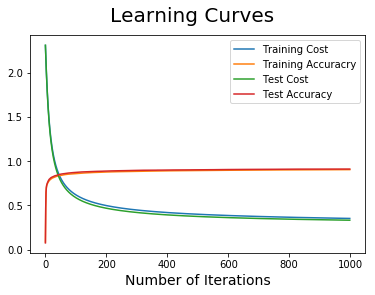

In [47]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
for i in range(len(accs)):
    accs[i] = float(accs[i]/100)
    accs_test[i] = float(accs_test[i]/100)
plt.plot(costs, label = 'Training Cost')
plt.plot(accs, label = 'Training Accuracry')
plt.plot(costs_test, label = 'Test Cost')
plt.plot(accs_test, label = 'Test Accuracy')
plt.legend()
plt.savefig('SingleLayer.png')

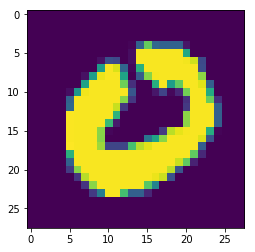

It is a :  0


In [48]:
index = 25
print()
x = X_test[:,index].reshape(784,1)
im = x.reshape(28,28)
plt.imshow(im)
plt.show()
Z, A = forward_prop(x, W, b)
print("It is a : ",np.argmax(A))

In [49]:
import pandas as pd
dfW = pd.DataFrame(W)
dfb = pd.DataFrame(b)
dfW.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/Weight.csv",header=None,index=None)
dfb.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/Bias.csv",header=None,index=None)

dfcosts = pd.DataFrame(costs)
dfcosts.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/costs.csv",header=None,index=None)

dfaccs = pd.DataFrame(accs)
dfaccs.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/accs.csv",header=None,index=None)

dfaccs_test = pd.DataFrame(accs_test)
dfaccs_test.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/accs_test.csv",header=None,index=None)

dfcosts_test = pd.DataFrame(costs_test)
dfcosts_test.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/costs_test.csv",header=None,index=None)